### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [240]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [241]:
sunspots = sm.datasets.sunspots.load_pandas().data
air = pd.read_csv('data/AirPassengers.csv')

## Data Cleaning

In [242]:
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [243]:
# convert air month column to datetime object 
air['Month'] = pd.to_datetime(air['Month'])
# set timestamp object as index and rename columns 
air = air.set_index('Month')
air.rename_axis('Date', inplace=True)
air.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
air.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [244]:
sunspots

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [245]:
# covert year to datetime object and set to index 
sunspots['YEAR'] = pd.to_datetime(sunspots['YEAR'], format='%Y')
sunspots.rename(columns={'YEAR': 'Date'}, inplace=True)
sunspots = sunspots.set_index('Date')
sunspots.head()

,SUNACTIVITY
Date,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0


## Time Series Decomposition Analysis

In this analysis, we explore the decomposition of two time series datasets: sunspots and air passenger counts. The decomposition method is chosen based on the characteristics of each dataset.

### Sunspot Data
For the sunspot activity, I chose to go with an **additive decomposition** since the seasonal fluctuations are relatively constant over time and don't appear to grow or shrink in proportion to the trend. This suggests that the impact of the seasonal component is additive, not multiplicative.

In [246]:
# Additive decomposition of sunspot data
sunspot_decomposed = seasonal_decompose(sunspots['SUNACTIVITY'], model='additive', period=11)

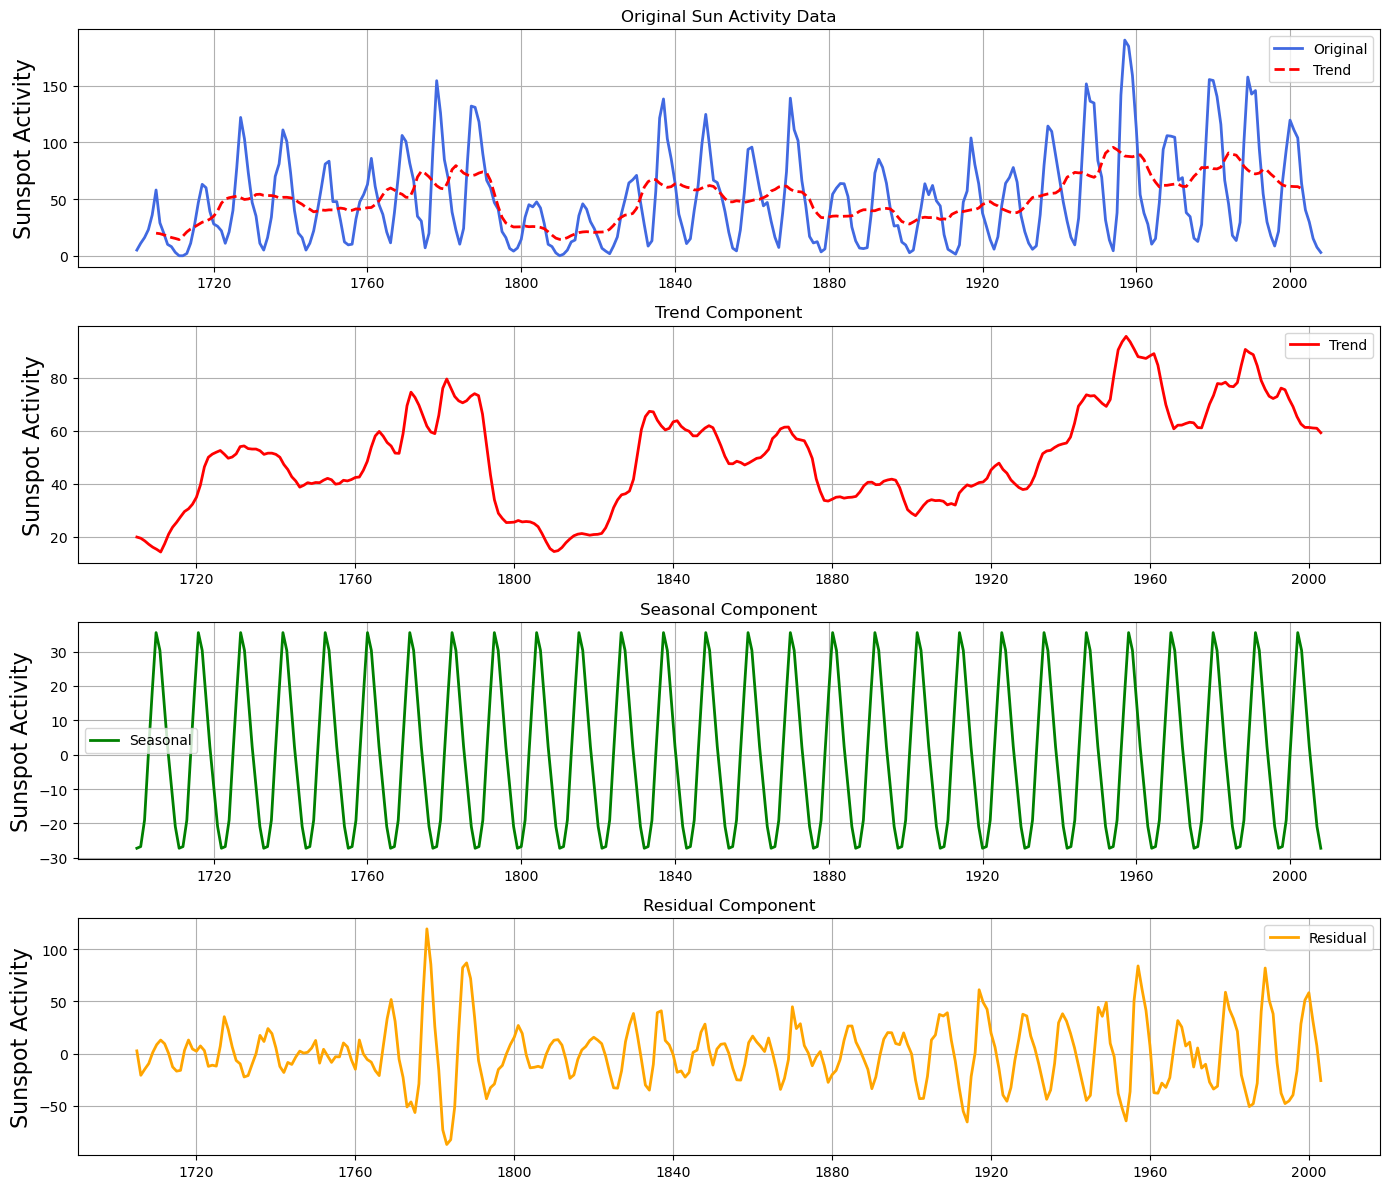

In [247]:
components = [('Original Sun Activity Data', sunspots['SUNACTIVITY'], 'royalblue'),
              ('Trend Component', sunspot_decomposed.trend, 'red'),
              ('Seasonal Component', sunspot_decomposed.seasonal, 'green'),
              ('Residual Component', sunspot_decomposed.resid, 'orange')]

plt.figure(figsize=(14, 12))
for i, (title, data, color) in enumerate(components, 1):
    plt.subplot(4, 1, i)
    plt.plot(data, label=title.split()[0], linewidth=2, color=color)
    if 'Original' in title:
        plt.plot(sunspot_decomposed.trend, 'r--', linewidth=2, label='Trend')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)

    # Setting y-axis label for all plots
    plt.ylabel('Sunspot Activity', fontsize=16)

plt.tight_layout()
plt.savefig('./images/sun.png')
plt.show()

- the observed data shows cyclic patterns rather than a clear long term trend 
- the trend smooths out the shorter term fluctuations and highlights periods of increasing and decreasing sunspot activity
- there seems to not be a seasonal pattern but more like a constand cycle therefore it is not a true seasonality
- the rediduals exhibit a fair amount of variability. This suggests that the additive model used for decomposition may not fully capture the complexity of the sunspot series

### Air Passenger Data
For the air passenger data I use a multiplicative decomposition. This approach is justified by the proportional increase in both the trend and seasonal amplitude over time. As the passenger counts grow, so do the seasonal peaks and troughs, indicating a multiplicative relationship between the time series and its components.

In [248]:
# Multiplicative decomposition of air passenger data
air_decomposed = seasonal_decompose(air['Passengers'], model='multiplicative', period=12)

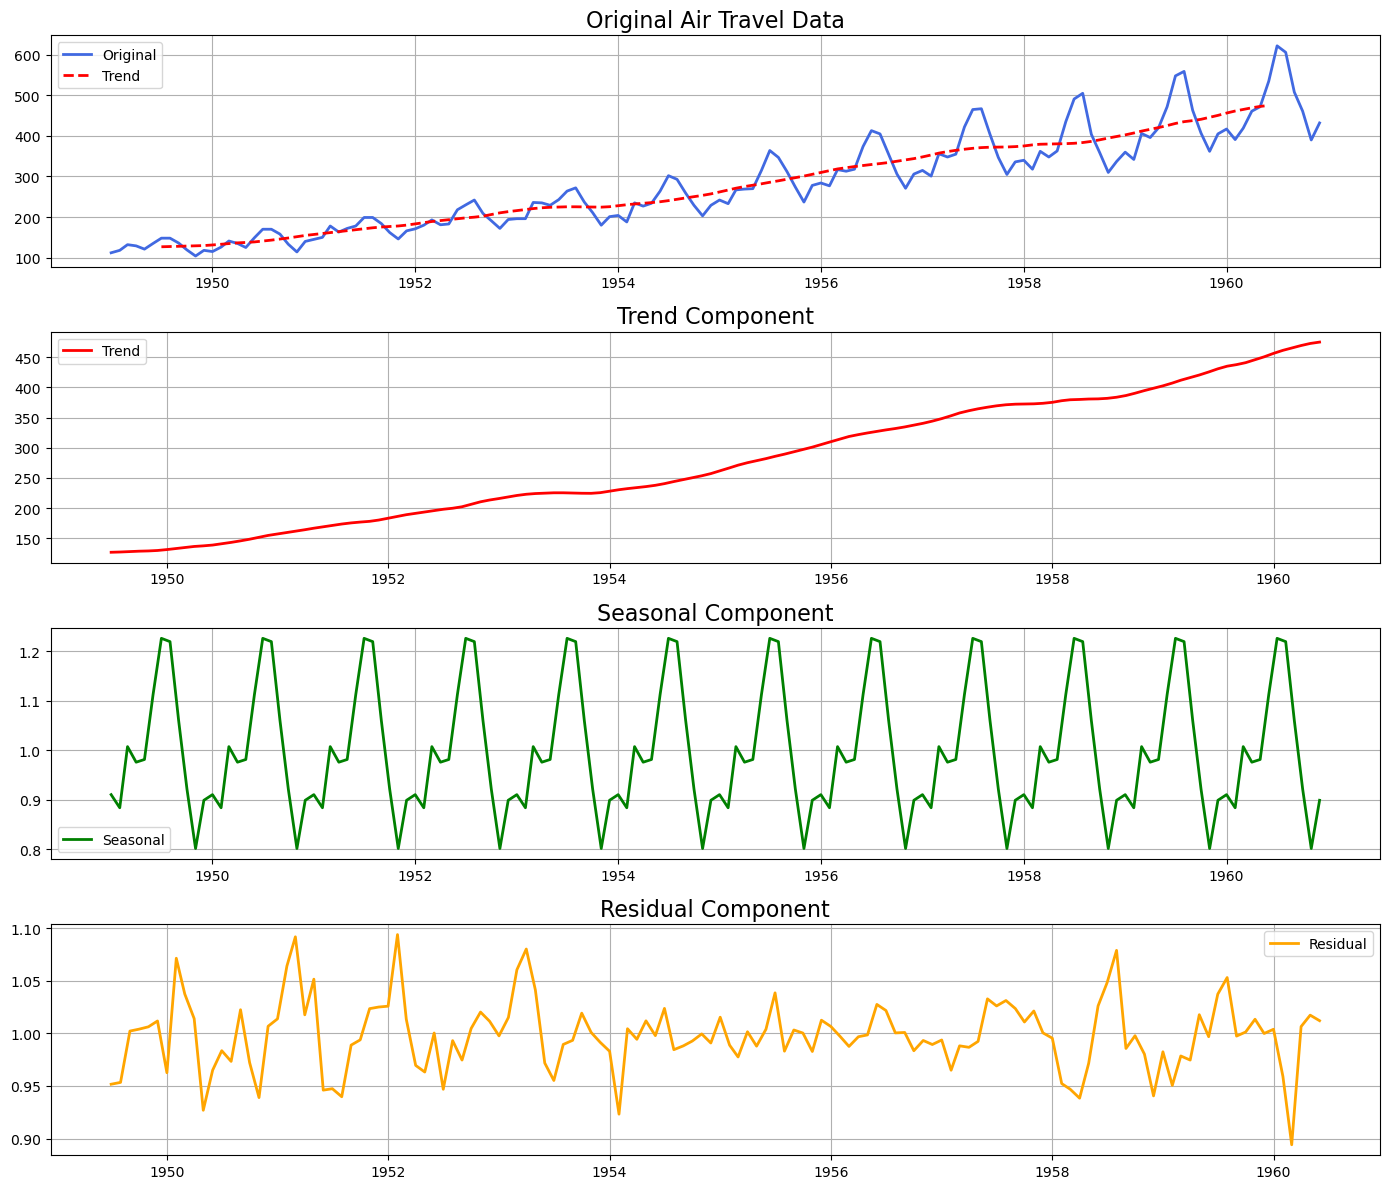

In [249]:
components = [('Original Air Travel Data', air['Passengers'], 'royalblue'),
              ('Trend Component', air_decomposed.trend, 'red'),
              ('Seasonal Component', air_decomposed.seasonal, 'green'),
              ('Residual Component', air_decomposed.resid, 'orange')]

plt.figure(figsize=(14, 12))
for i, (title, data, color) in enumerate(components, 1):
    plt.subplot(4, 1, i)
    plt.plot(data, label=title.split()[0], linewidth=2, color=color)
    if 'Original' in title:
        plt.plot(air_decomposed.trend, 'r--', linewidth=2, label='Trend')
    plt.title(title, fontsize=16)
    plt.legend(loc='best')
    plt.grid(True)
    
plt.tight_layout()
plt.savefig('./images/air.png')
plt.show()


- Observed data has an increasing trend with regular seasonal peaks
- There is a clear upward trend with steady growth in number of air passenger over the years
- peaks and troughs corresponding to particular times of the year, mirroring holidat travel surges
- after removing the trend and seasonality, the residuals show relatively small irregularities, indicating the multiplicative model captures the main patterns quite well

## Conclusion
Both series underline the diversity within time series data and the necessity of tailoring decomposition approaches to the dataset's specific characteristics to effectively capture and understand underlying patterns.